In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson
from scipy.integrate import solve_ivp
from green_solver import *

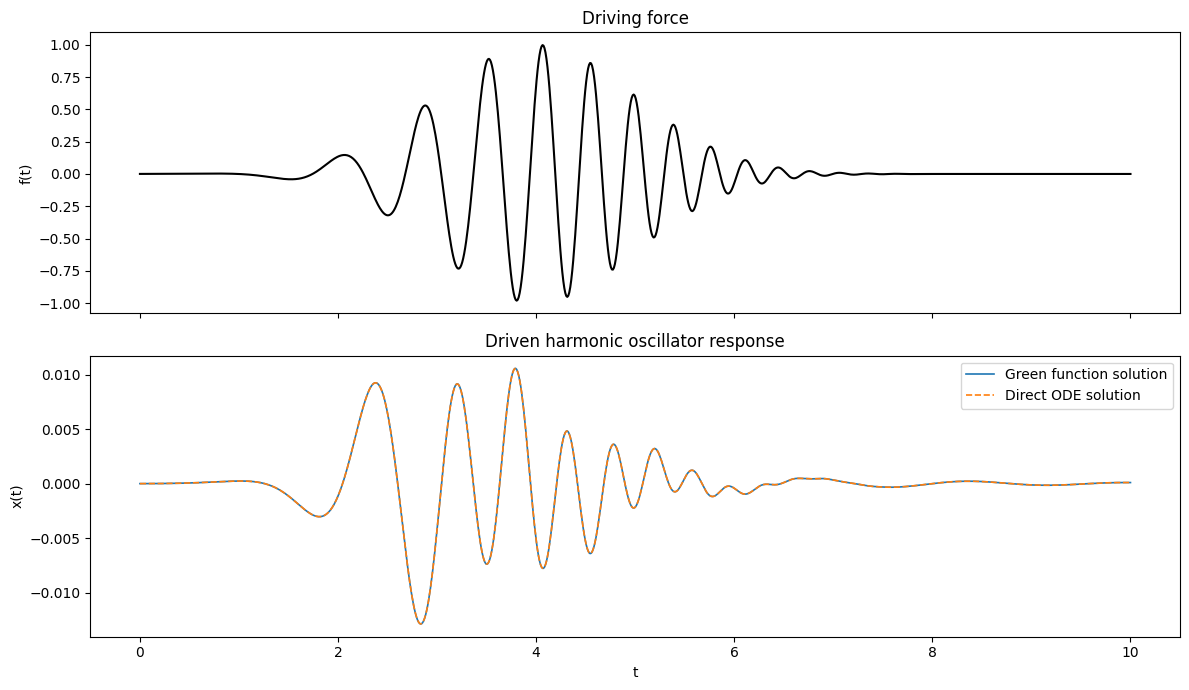

In [2]:
m = 1.0
gamma = 1
omega0 = 4.0

osc = DrivenHarmonicOscillator(m=m, gamma=gamma, omega0=omega0)

# time grid
T = 10.0
N = 1000
t = np.linspace(0, T, N)

# Example driving force: a Gaussian pulse
f = np.exp(-(t - 4)**2 / 0.1**2)

# define chirp driving force
f = chirp_force(t, 
                A=1.0,
                omega_min=0.1,   # start frequency
                omega_max=30.0,   # end frequency
                t0=4,
                sigma=1.0)
# Solve via Green's function
x_green = osc.solve_via_green(t, f)

# Solve directly integrating the ODE
x_ode = osc.solve_direct_ode(t, f)

fig, axs = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# --- Top plot: driving force f(t)
axs[0].plot(t, f, color='black')
axs[0].set_ylabel("f(t)")
axs[0].set_title("Driving force")

# --- Bottom plot: oscillator response
axs[1].plot(t, x_green, label="Green function solution", linewidth=1.2)
axs[1].plot(t, x_ode, '--', label="Direct ODE solution", linewidth=1.2)

axs[1].set_xlabel("t")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Driven harmonic oscillator response")
axs[1].legend()

plt.tight_layout()
plt.show()

# Chirp signal

In [45]:
# time grid around the 5 MHz mode
T = 3e-5      # 10 ms
N = 20000
t = np.linspace(0, T, N)

# build a toy GW signal (linear chirp across resonance)
baw = BAWMode()
h_plus = baw.linear_chirp_strain(
    t,
    A0=2e-21,
    f_start=4e6,
    f_end=6e6,
    envelope=np.exp((t/T)**2)
)

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

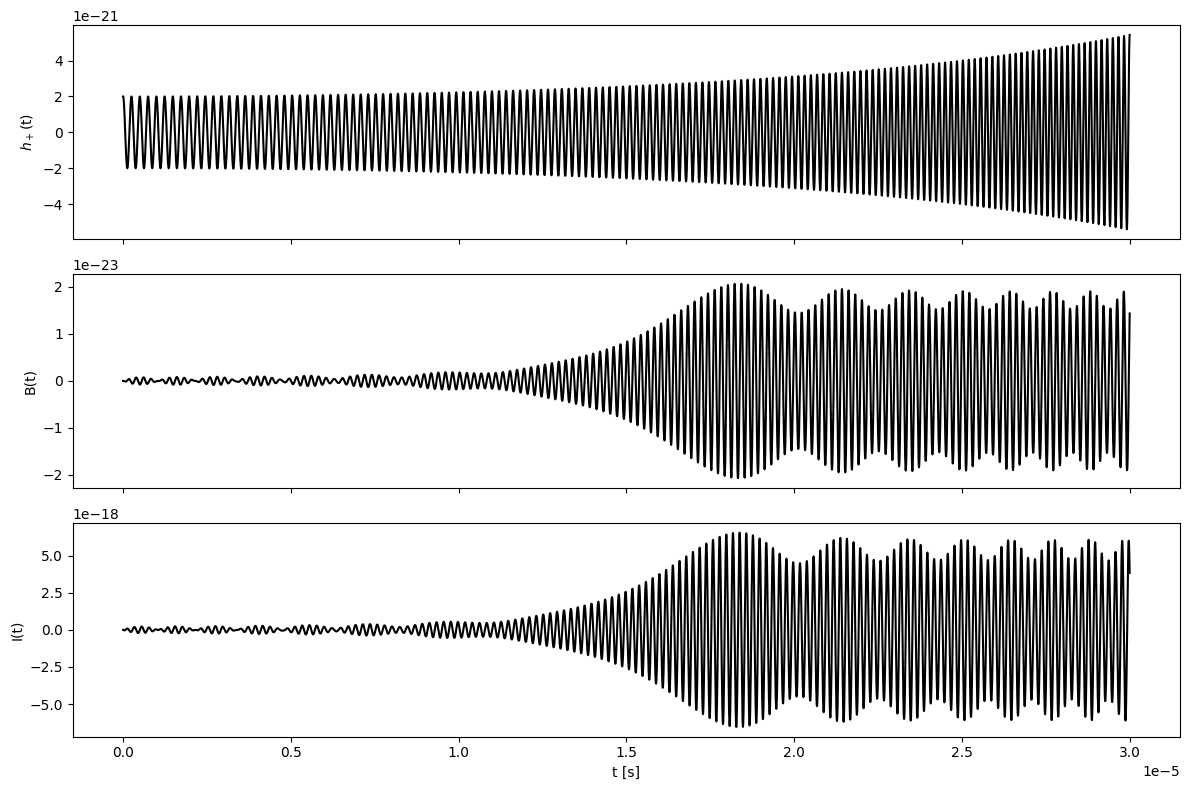

In [14]:
# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)")

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)")

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)")
axs[2].set_xlabel("t [s]")

plt.tight_layout()
plt.show()

# Infinite sine wave

In [27]:
# time grid around the 5 MHz mode
T = 3e-5      # 10 ms
N = 5000
t = np.linspace(0, T, N)
baw = BAWMode(Q=1e7)

# build a toy GW signal (linear chirp across resonance)
h_plus = 1e-21* np.sin(baw.omega_lambda*t)

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


fig.tight_layout()
fig.savefig('plots/long_sine.png')


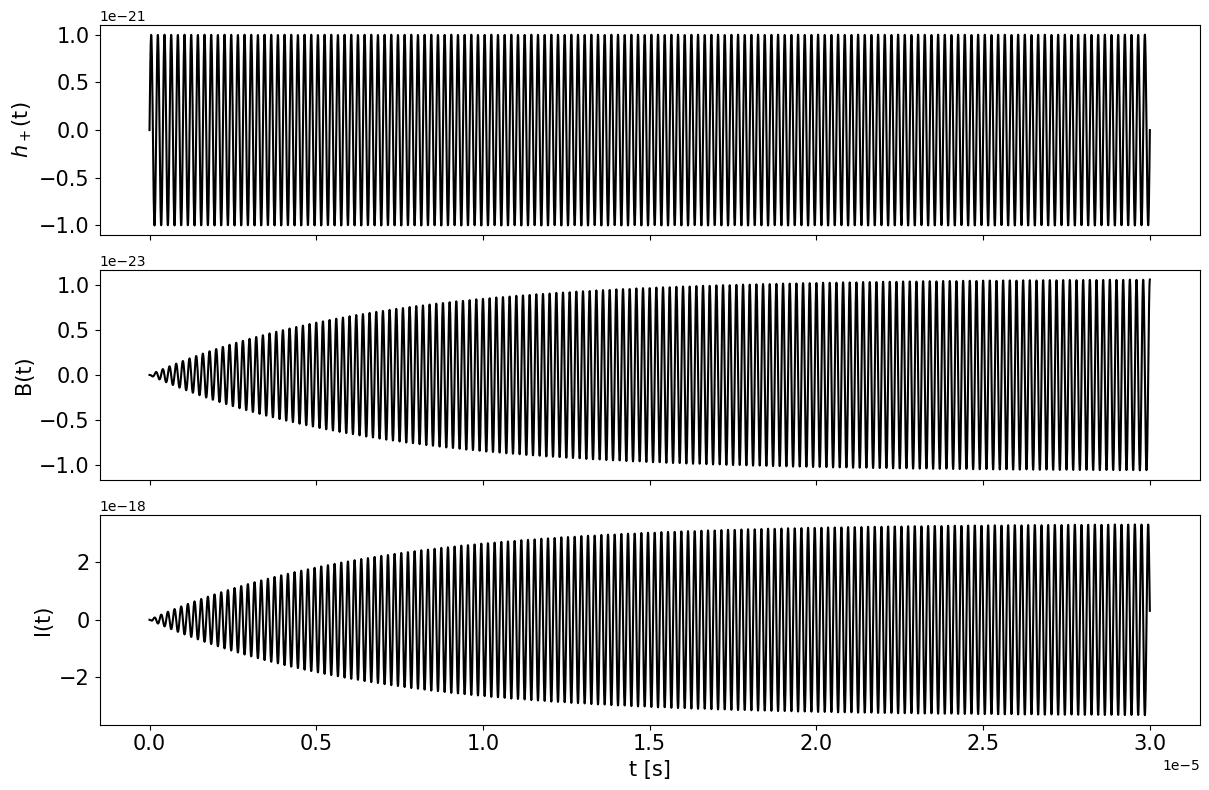

In [30]:
# time grid around the 5 MHz mode
T = 3e-5      # 10 ms
N = 5000
t = np.linspace(0, T, N)
baw = BAWMode(Q=1e2)

# build a toy GW signal (linear chirp across resonance)
h_plus = 1e-21* np.sin(baw.omega_lambda*t)

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


fig.tight_layout()
fig.savefig('plots/long_sine_lowQ.png')


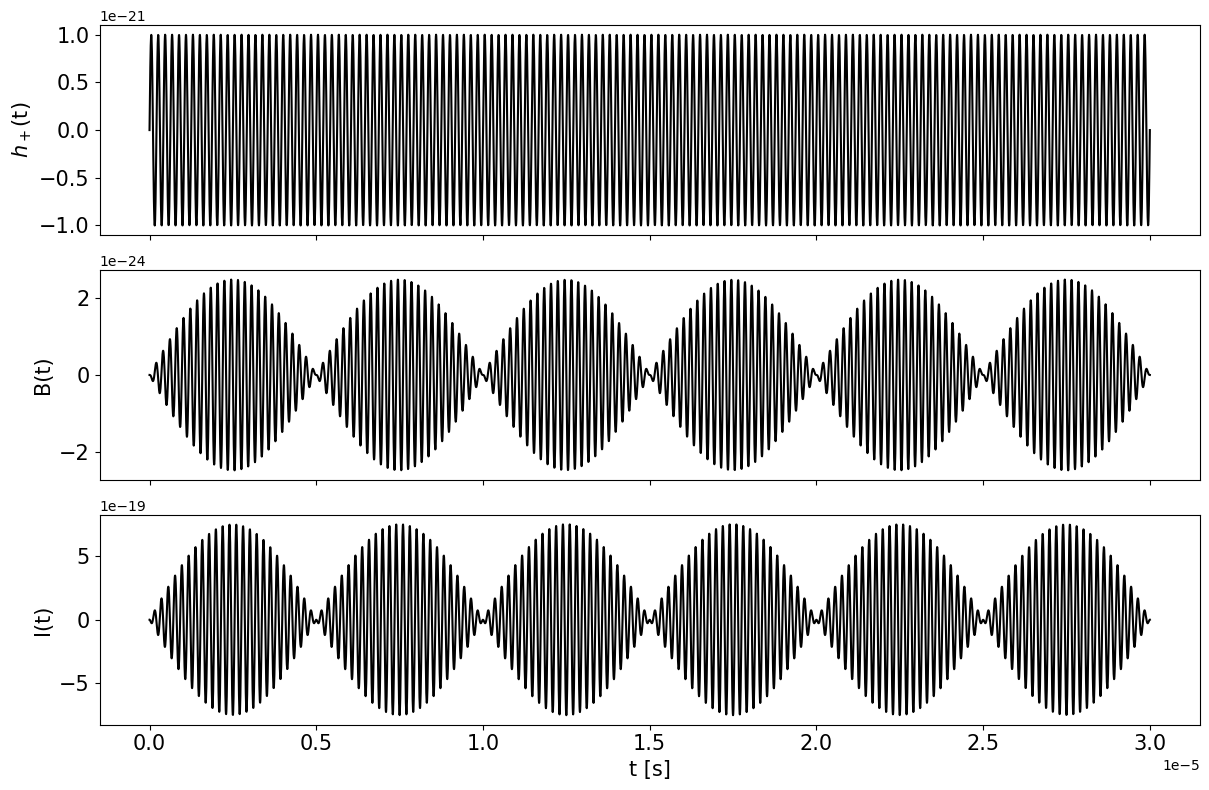

In [34]:
# time grid around the 5 MHz mode
T = 3e-5      # 10 ms
N = 5000
t = np.linspace(0, T, N)
baw = BAWMode(Q=1e7)

# build a toy GW signal (linear chirp across resonance)
h_plus = 1e-21* np.sin(2*np.pi*4.8e6*t)

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


fig.tight_layout()
fig.savefig('plots/long_sine_off_res.png')


In [15]:
# ------------------------------------------------------
# Time grid
# ------------------------------------------------------
T = 5e-5                 # total time
N = 2000
t = np.linspace(0, T, N)
baw = BAWMode()

# ------------------------------------------------------
# Frequency sweep (e.g. around 5 MHz mode)
# ------------------------------------------------------
f_center = 5e6
df = 4e5                 # sweep ±100 kHz
Nf = 101                 # number of frequencies
freqs = np.linspace(f_center - df, f_center + df, Nf)

# ------------------------------------------------------
# Store current waveforms or amplitudes
# ------------------------------------------------------
I_time = np.zeros((Nf, N)) # full time series (optional)

# ------------------------------------------------------
# Loop over drive frequencies
# ------------------------------------------------------
for i, f in enumerate(freqs):
    print(f'{i+1}/{len(freqs)}', end='\r')
    # build monochromatic drive at the chosen frequency
    h_plus = 1e-21*np.sin(2*np.pi*f*t)

    B, Bdot, I, f_drive = baw.solve_current(t, h_plus)
    I_time[i] = I


101/101

<Figure size 1000x600 with 0 Axes>

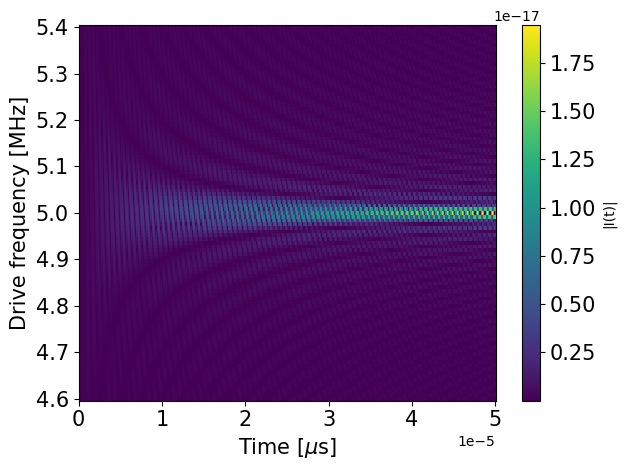

In [16]:
# ------------------------------------------------------
# PCOLORMESH plot of |I(t)| vs frequency
# ------------------------------------------------------
plt.figure(figsize=(10,6))

# use magnitude of current for visualisation
P = np.abs(I_time)

fig,ax = plt.subplots()
cm = ax.pcolormesh(t, freqs/1e6, P, shading='auto')
ax.set_xlabel(r"Time [$\mu$s]", fontsize=15)
ax.set_ylabel("Drive frequency [MHz]", fontsize=15)
ax.tick_params(labelsize=15)
fig.colorbar(cm, label="|I(t)|").ax.tick_params(labelsize=15) 
fig.tight_layout()
fig.savefig('plots/chevron.png')


In [31]:
# ------------------------------------------------------
# Time grid
# ------------------------------------------------------
T = 5e-5                 # total time
N = 2000
t = np.linspace(0, T, N)
baw = BAWMode(Q=1e2)

# ------------------------------------------------------
# Frequency sweep (e.g. around 5 MHz mode)
# ------------------------------------------------------
f_center = 5e6
df = 4e5                 # sweep ±100 kHz
Nf = 101                 # number of frequencies
freqs = np.linspace(f_center - df, f_center + df, Nf)

# ------------------------------------------------------
# Store current waveforms or amplitudes
# ------------------------------------------------------
I_time = np.zeros((Nf, N)) # full time series (optional)

# ------------------------------------------------------
# Loop over drive frequencies
# ------------------------------------------------------
for i, f in enumerate(freqs):
    print(f'{i+1}/{len(freqs)}', end='\r')
    # build monochromatic drive at the chosen frequency
    h_plus = 1e-21*np.sin(2*np.pi*f*t)

    B, Bdot, I, f_drive = baw.solve_current(t, h_plus)
    I_time[i] = I


101/101

<Figure size 1000x600 with 0 Axes>

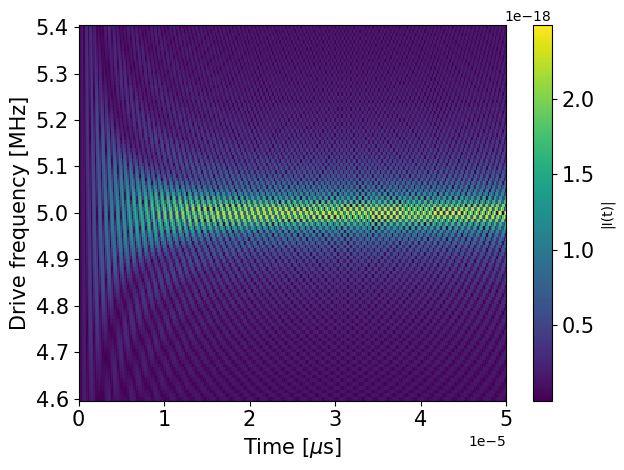

In [32]:
# ------------------------------------------------------
# PCOLORMESH plot of |I(t)| vs frequency
# ------------------------------------------------------
plt.figure(figsize=(10,6))

# use magnitude of current for visualisation
P = np.abs(I_time)

fig,ax = plt.subplots()
cm = ax.pcolormesh(t, freqs/1e6, P, shading='auto')
ax.set_xlabel(r"Time [$\mu$s]", fontsize=15)
ax.set_ylabel("Drive frequency [MHz]", fontsize=15)
ax.tick_params(labelsize=15)
fig.colorbar(cm, label="|I(t)|").ax.tick_params(labelsize=15) 
fig.tight_layout()
fig.savefig('plots/chevron_lowQ.png')


# Square pulse on resonance

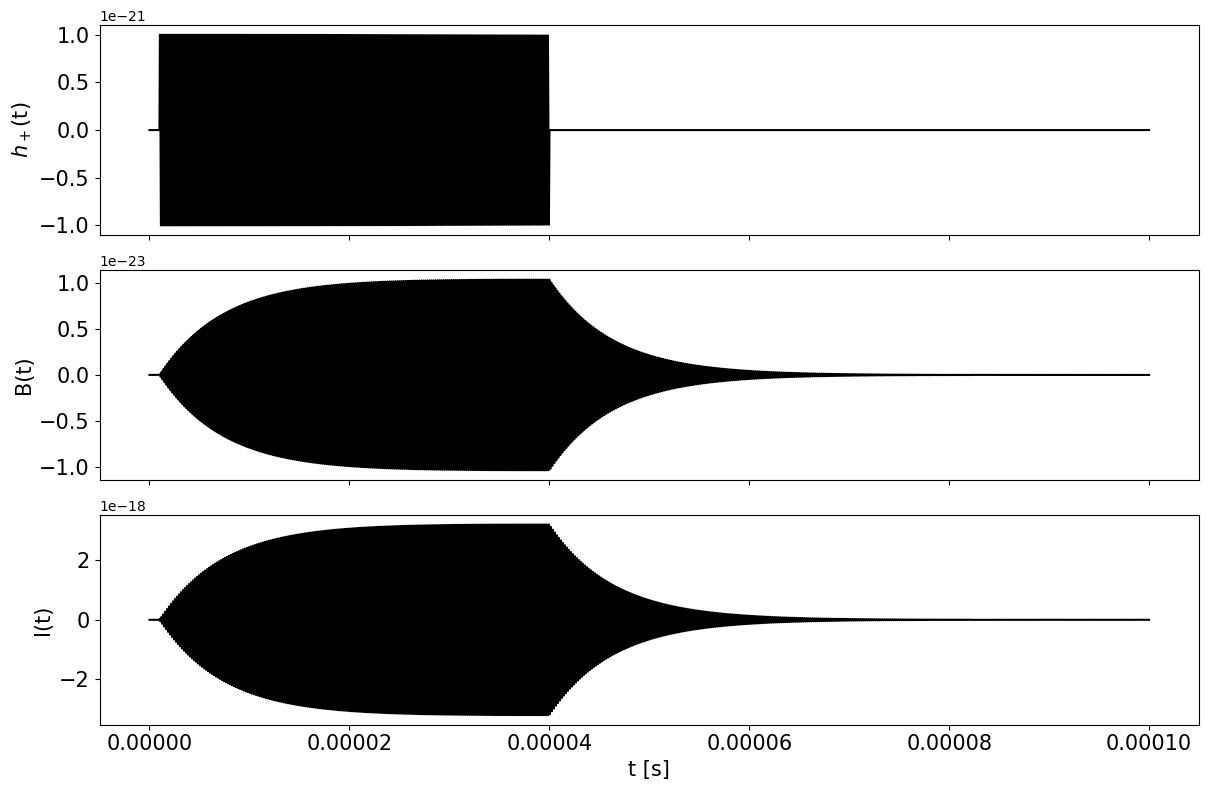

In [17]:
# time grid around the 5 MHz mode
T = 10e-5      # 10 ms
N = 10000
t = np.linspace(0, T, N)

baw = BAWMode(Q=1e2)
# build a toy GW signal (linear chirp across resonance)
h_plus = 1e-21*np.sin(baw.omega_lambda*t)*np.heaviside(t-1e-6, 1)*(1-np.heaviside(t-4e-5, 1))

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


plt.tight_layout()
fig.savefig('plots/long_square.png')


# Chirp 

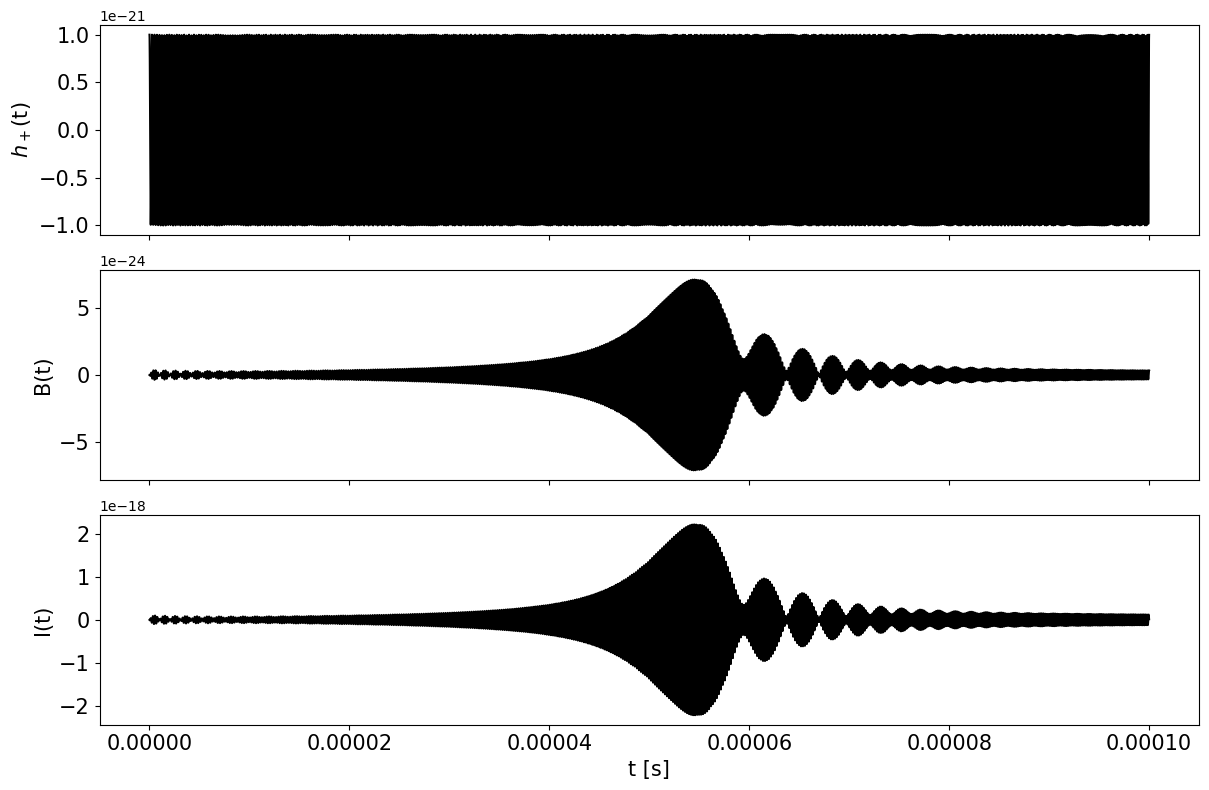

In [18]:
# time grid around the 5 MHz mode
T = 10e-5      # 10 ms
N = 10000
t = np.linspace(0, T, N)

# build a toy GW signal (linear chirp across resonance)
baw = BAWMode(Q=1e2)
h_plus = baw.linear_chirp_strain(
    t,
    A0=1e-21,
    f_start=4e6,
    f_end=6e6,
    envelope=None
)

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)

# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


plt.tight_layout()
fig.savefig('plots/chirp.png')


# Test envelope solver

In [23]:
# time grid around the 5 MHz mode
T = 10e-5      # 10 ms
N = 10000
t = np.linspace(0, T, N)

baw = BAWMode(Q=1e6)
# build a toy GW signal (linear chirp across resonance)
h_plus = 1e-21*np.sin(baw.omega_lambda*t)*np.heaviside(t-1e-6, 1)*(1-np.heaviside(t-4e-5, 1))

# solve BAW response and current
B, Bdot, I, f_drive = baw.solve_current(t, h_plus)
_,_, I_env, _, A= baw.solve_current_envelope(t, h_plus)

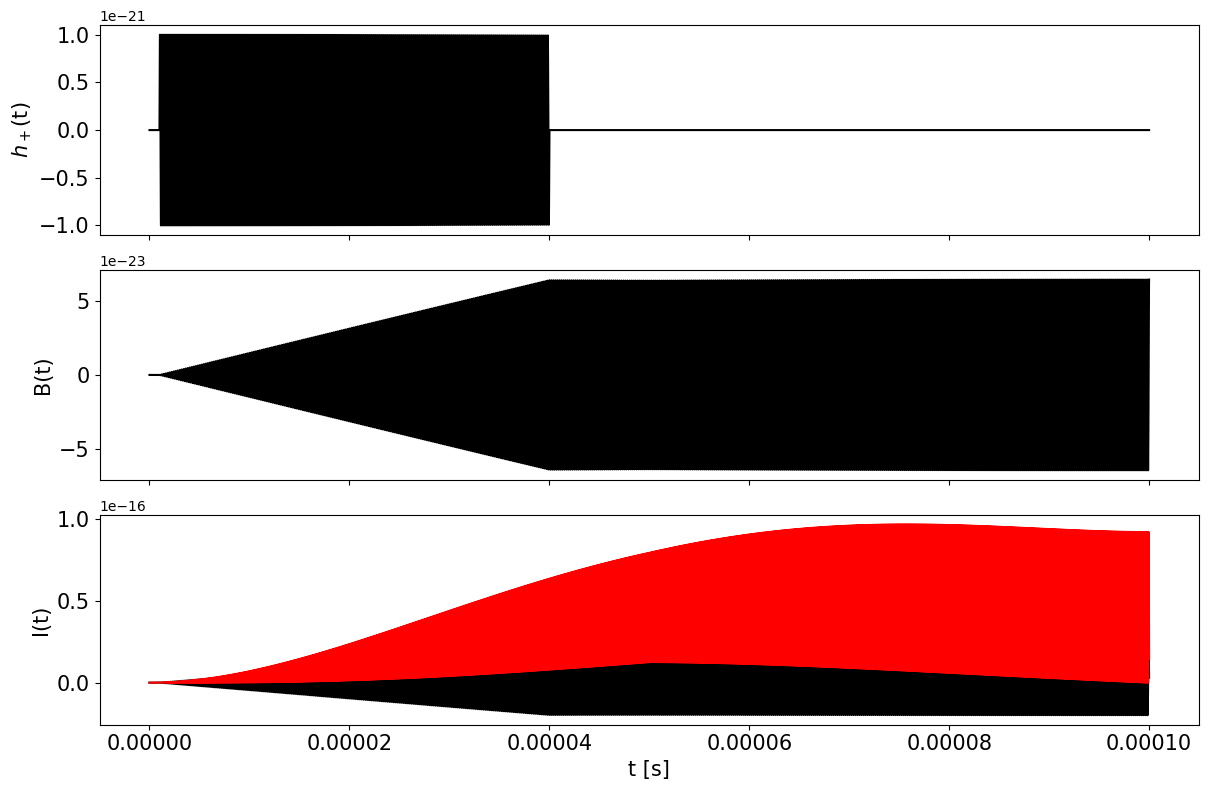

In [28]:
# quick plots
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


plt.tight_layout()

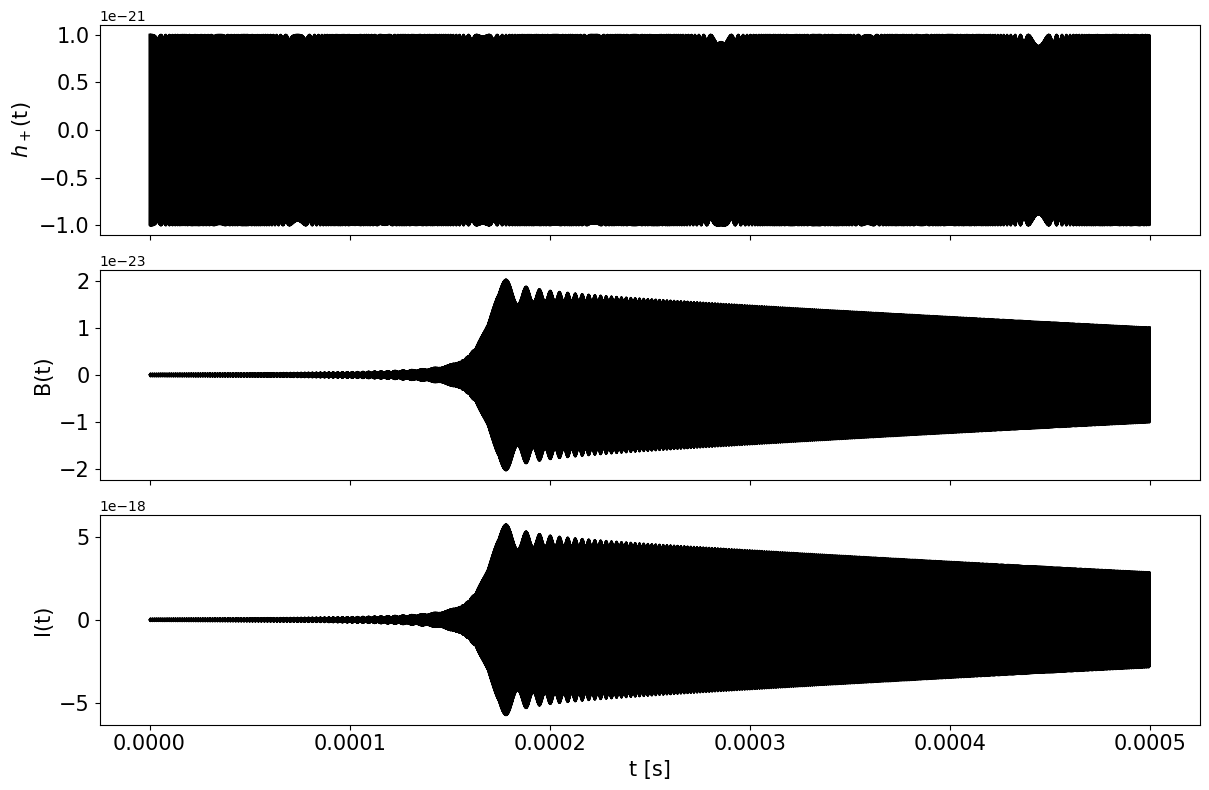

In [22]:
mode = BAWMode(omega_lambda=2*np.pi*5e6, Q=1e7)

# slow time grid: resolves chirp/envelope, not MHz carrier
t = np.linspace(0.0, 50e-5, 20000)   # for example

# build GW chirp signal and envelope
h_plus = mode.linear_chirp_strain(
    t,
    A0=1e-21,
    f_start=4e6,
    f_end=7e6,
)


# solve in envelope picture
# B, Bdot, I_env, F_env, A = mode.solve_current_envelope(t, h_env, omega_c=omega_c)
B, Bdot, I, _ = mode.solve_current(t, h_plus)

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, h_plus, color='k')
axs[0].set_ylabel("$h_+$(t)", fontsize=15)
axs[0].tick_params(labelsize=15)

axs[1].plot(t, B, color='k')
axs[1].set_ylabel("B(t)", fontsize=15)
axs[1].tick_params(labelsize=15)

axs[2].plot(t, I, color='k')
# axs[2].plot(t, I_env, color='r')
axs[2].set_ylabel("I(t)", fontsize=15)
axs[2].set_xlabel("t [s]", fontsize=15)
axs[2].tick_params(labelsize=15)


plt.tight_layout()